In [1]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, InputLayer
from keras.optimizers import Adam
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Dataset/wage.csv', sep=";", index_col=False).round(2)
df 

,wage,educ,exper,metro
0,2.07,12,7,1
1,2.12,12,35,1
2,2.54,16,20,1
3,2.68,12,24,1
4,3.09,13,4,1
...,...,...,...,...
993,35.42,18,23,1
994,36.84,16,7,1
995,41.32,16,11,1
996,47.22,18,35,1


/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/riccardo/anaconda3/envs/model/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

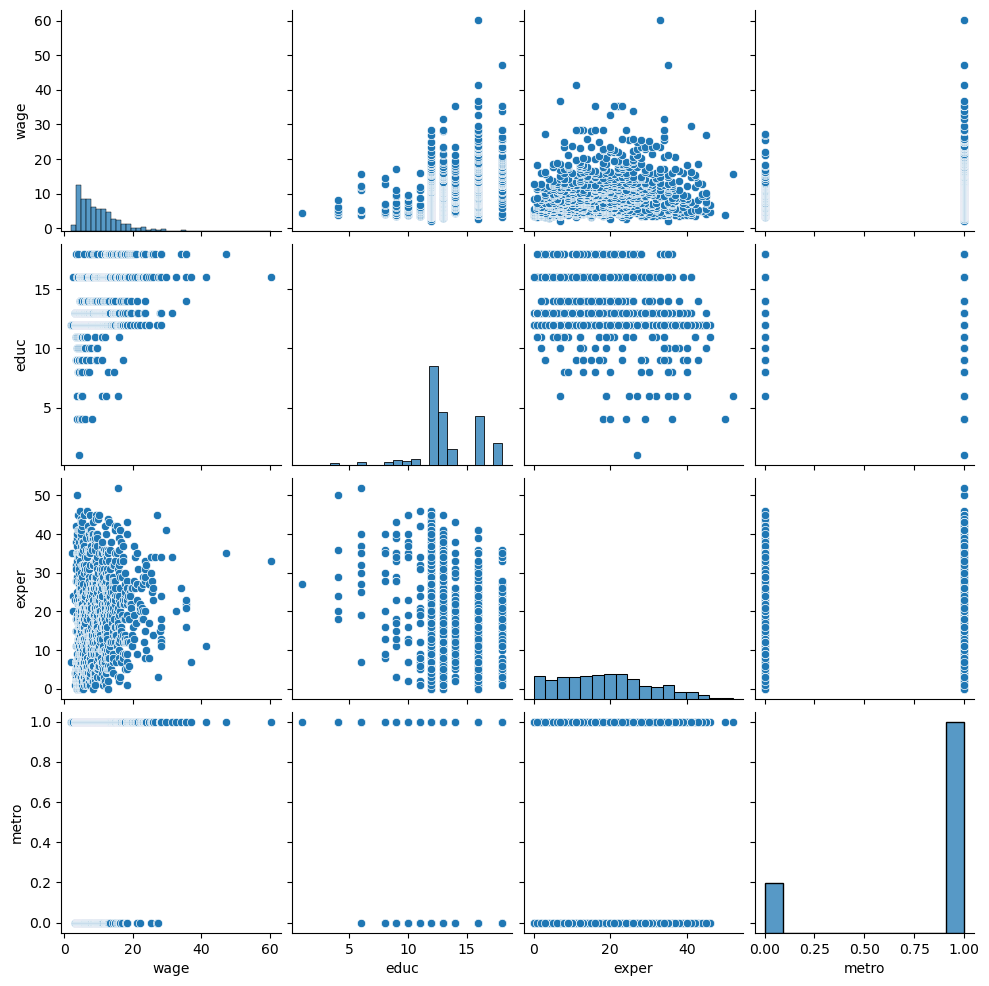

In [45]:
sns.pairplot(df)

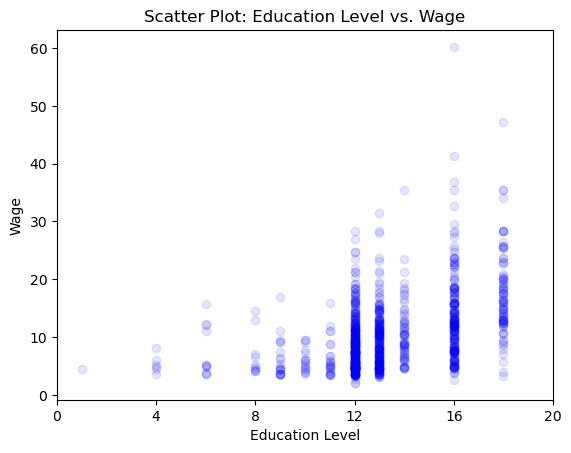

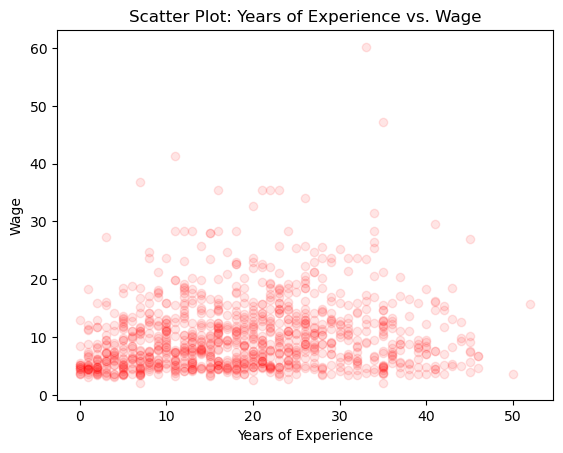

In [12]:
# Scatter-Plot von 'educ' gegen 'wage'
plt.scatter(df['educ'], df['wage'], alpha=0.1, color='b')
plt.xlabel('Education Level')
plt.ylabel('Wage')#
plt.xticks(np.arange(0, 21, step=4))  # Festlegen der x-Achsenticks von 0 bis 20 in Schritten von 2
plt.title('Scatter Plot: Education Level vs. Wage')
plt.show()

# Scatter-Plot von 'exper' gegen 'wage'
plt.scatter(df['exper'], df['wage'], alpha=0.1, color='r')
plt.xlabel('Years of Experience')
plt.ylabel('Wage')
plt.title('Scatter Plot: Years of Experience vs. Wage')
plt.show()


In [3]:
X = df[['educ', 'exper']]
y = df[['wage']]
X.head()


,educ,exper
0,12,7
1,12,35
2,16,20
3,12,24
4,13,4


In [4]:
def train_test_valid_split(df, train_size, test_size, valid_size_min, valid_size_max):
    """Function to split the data into train, test, and validation sets.

    Input:
    - df: Pandas DataFrame containing the data.
    - train_size: Number of rows to be used as training data.
    - test_size: Number of rows to be used as test data.
    - valid_size_min: Minimum number of rows to be used as validation data.
    - valid_size_max: Maximum number of rows to be used as validation data.

    Output:
    - A split of the data into train, test, and validation sets.
    """
    X_train, y_train = X.iloc[:train_size], y.iloc[:train_size, -1]
    X_valid, y_valid = X.iloc[valid_size_min:valid_size_max], y.iloc[valid_size_min:valid_size_max, -1]
    X_test, y_test = X.iloc[test_size:], y.iloc[test_size:, -1]
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

# Example usage
X_train, y_train, X_valid, y_valid, X_test, y_test = train_test_valid_split(df, train_size=700, test_size=900, valid_size_min=700, valid_size_max=900)


# X_train, y_train = X.iloc[:700], y.iloc[:700, -1]
# X_valid, y_valid = X.iloc[700:900], y.iloc[700:900, -1]
# X_test, y_test = X.iloc[900:], y.iloc[900:, -1]


In [5]:
print("Der X Test Datensatz besthet aus: ", X_train.shape, "Der Y Test Datensatz besthet aus: ", y_train.shape)
print("Der X_test Datensatz besthet aus: ", X_test.shape,"Der y_test Datensatz besteht  aus: ", y_test.shape)
print("X_train ", type(X_train), "y_train type:", type(y_train), 
      "X_test type:",type(X_test), "X_test type:",type(y_test), 
      "X_val", type(X_valid), "y_val", type(y_valid))

Der X Test Datensatz besthet aus:  (700, 2) Der Y Test Datensatz besthet aus:  (700,)
Der X_test Datensatz besthet aus:  (98, 2) Der y_test Datensatz besteht  aus:  (98,)
X_train  <class 'pandas.core.frame.DataFrame'> y_train type: <class 'pandas.core.series.Series'> X_test type: <class 'pandas.core.frame.DataFrame'> X_test type: <class 'pandas.core.series.Series'> X_val <class 'pandas.core.frame.DataFrame'> y_val <class 'pandas.core.series.Series'>


In [6]:
y_pred = X_valid.iloc[:, -1].values
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

158.0

# Model 1 

In [12]:
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential([
    Flatten(input_shape = X_train.shape[1:], name = "Input"),  # Beachten Sie die Korrektur hier
    Dense(1, name = "Output"),
])

optimizer = Adam()  # Default learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=["accuracy"])  # Using MSE for loss and MAE for metrics
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 2)                 0         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0


_________________________________________________________________


In [13]:
# Beispiel für das Modelltraining
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
history

Epoch 1/5
22/22 [==============================] - 0s 3ms/step - loss: 1588.4734 - accuracy: 0.0000e+00 - val_loss: 2537.0254 - val_accuracy: 0.0000e+00
Epoch 2/5
22/22 [==============================] - 0s 1ms/step - loss: 1531.7860 - accuracy: 0.0000e+00 - val_loss: 2456.3491 - val_accuracy: 0.0000e+00
Epoch 3/5
22/22 [==============================] - 0s 1ms/step - loss: 1476.0746 - accuracy: 0.0000e+00 - val_loss: 2377.8015 - val_accuracy: 0.0000e+00
Epoch 4/5
22/22 [==============================] - 0s 1ms/step - loss: 1422.4496 - accuracy: 0.0000e+00 - val_loss: 2300.1482 - val_accuracy: 0.0000e+00
Epoch 5/5
22/22 [==============================] - 0s 1ms/step - loss: 1369.8143 - accuracy: 0.0000e+00 - val_loss: 2224.9570 - val_accuracy: 0.0000e+00


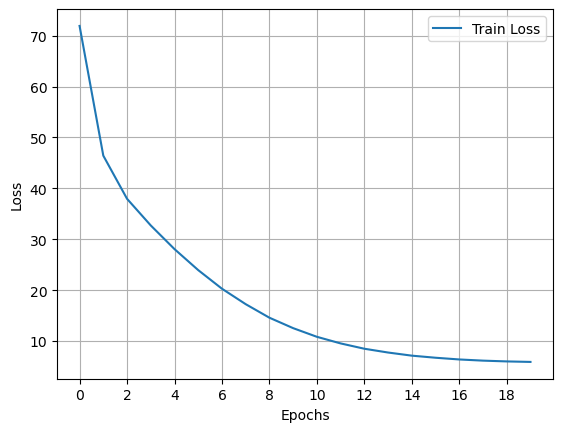

In [49]:
def create_plt_loss(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['loss'], label='Train Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

create_plt_loss(history, x_tick_min = 0, 
                x_tick_max =  20, x_tick_step=2)

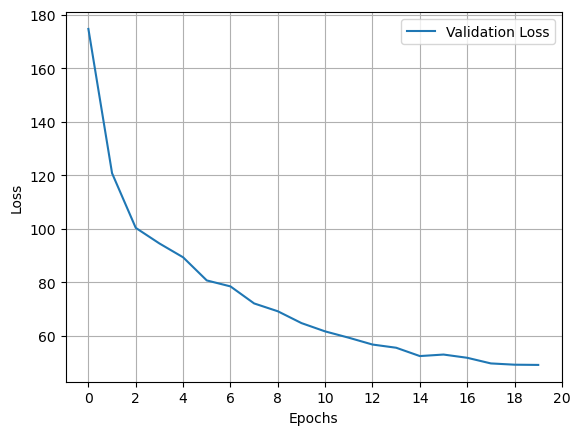

In [50]:
def create_plt_val_los(history, x_tick_min = int, x_tick_max = int, x_tick_step = int):
    """
    Create a plot for the loss of the model

    Input : 
    - history : history of the model  
    - x_ticks : list of integers for the x-axis

    Output : 
    - Plot of the loss
    """
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xticks(np.arange(x_tick_min, x_tick_max, 
                         step=x_tick_step))
    plt.grid(True)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return plt.show()

    
create_plt_val_los(history, x_tick_min = 0,x_tick_max=22, x_tick_step=2)

In [51]:
# Beispiel für die Modellbewertung
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


4/4 [==============================] - 0s 778us/step - loss: 292.9405
Test Loss: 292.9404602050781


In [52]:
predictions = model.predict(X_test)
predictions.shape

4/4 [==============================] - 0s 559us/step


(98, 1)

In [53]:
y_test.shape, predictions.shape

((98,), (98, 1))

In [54]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions.flatten()
})
results_df

,True Values,Predicted Values
0,18.23,8.513268
1,18.27,7.728713
2,18.33,8.188528
3,18.39,6.294682
4,18.42,9.482275
...,...,...
93,35.42,9.271847
94,36.84,7.390988
95,41.32,7.671558
96,47.22,10.113556


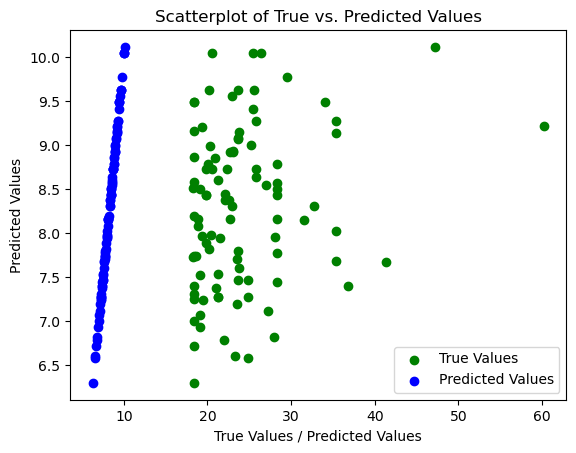

In [55]:
# Scatterplot für "True Values" in Grün
plt.scatter(results_df["True Values"], results_df["Predicted Values"], color='green', label='True Values')

# Scatterplot für "Predicted Values" in Blau
plt.scatter(results_df["Predicted Values"], results_df["Predicted Values"], color='blue', label='Predicted Values')

plt.xlabel('True Values / Predicted Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of True vs. Predicted Values')
plt.legend()
plt.show()


# Ende Model 1

# Model 2 

2 Model: LSTM

In [72]:
# Model infrastructure
model_2 = Sequential([
    InputLayer(input_shape=(X_train.shape[1], 1), name='Input'),
    LSTM(units=2, return_sequences=True, activation="relu", name='layer1'),
    LSTM(units=2, return_sequences=False, activation="relu", name='layer2'),
    Dense(units=1, name='Output')
])

    

In [73]:
model_2.compile(optimizer='adam', loss='mean_squared_error')     
model_2.summary() 

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (LSTM)               (None, 2, 2)              32        
                                                                 
 layer2 (LSTM)               (None, 2)                 40        
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [74]:
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
history_2

Epoch 1/20
22/22 [==============================] - 1s 17ms/step - loss: 55.9962 - val_loss: 212.6316
Epoch 2/20
22/22 [==============================] - 0s 2ms/step - loss: 55.6873 - val_loss: 211.9952
Epoch 3/20
22/22 [==============================] - 0s 2ms/step - loss: 55.3774 - val_loss: 211.3671
Epoch 4/20
22/22 [==============================] - 0s 2ms/step - loss: 55.0720 - val_loss: 210.7334
Epoch 5/20
22/22 [==============================] - 0s 2ms/step - loss: 54.7659 - val_loss: 210.1046
Epoch 6/20
22/22 [==============================] - 0s 2ms/step - loss: 54.4632 - val_loss: 209.4741
Epoch 7/20
22/22 [==============================] - 0s 2ms/step - loss: 54.1606 - val_loss: 208.8486
Epoch 8/20
22/22 [==============================] - 0s 2ms/step - loss: 53.8593 - val_loss: 208.2268
Epoch 9/20
22/22 [==============================] - 0s 2ms/step - loss: 53.5601 - val_loss: 207.6053
Epoch 10/20
22/22 [==============================] - 0s 2ms/step - loss: 53.2635 - val_los

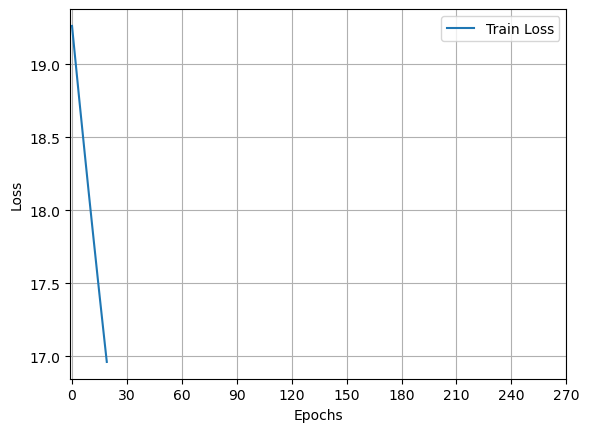

In [30]:
create_plt_loss(history_2, x_tick_min = 0,x_tick_max=275, x_tick_step=30)

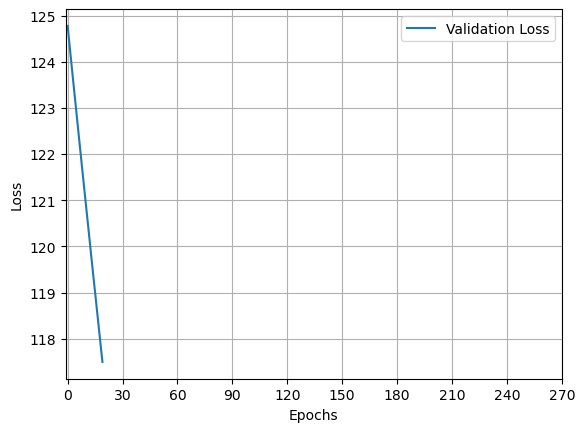

In [31]:
create_plt_val_los(history_2, x_tick_min = 0,x_tick_max=275, x_tick_step=30)  

In [32]:
test_loss_2 = model_2.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)

4/4 [==============================] - 0s 1ms/step - loss: 456.6984
Test Loss of Model 1: 372.1376037597656
Test Loss of Model 2: 456.6983947753906


In [36]:
predictions_2 = model_2.predict(X_test)
predictions_2.shape

4/4 [==============================] - 0s 1ms/step


(98, 1)

In [37]:
# Erstelle eine DataFrame für die wahren und vorhergesagten Werte
results_df_2 = pd.DataFrame({
    'True Values': y_test.values.flatten(),
    'Predicted Values': predictions_2.flatten()
})
results_df_2

,True Values,Predicted Values
0,18.23,0.43315
1,18.27,0.43315
2,18.33,0.43315
3,18.39,0.43315
4,18.42,0.43315
...,...,...
93,35.42,0.43315
94,36.84,0.43315
95,41.32,0.43315
96,47.22,0.43315


In [38]:
results_df_2.columns

Index(['True Values', 'Predicted Values'], dtype='object')

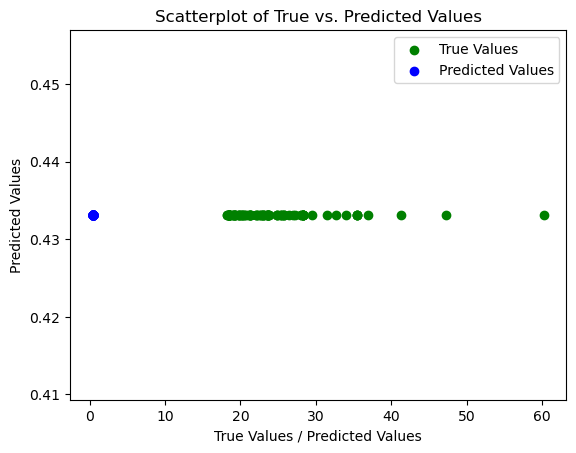

In [39]:
# Scatterplot für "True Values" in Grün
plt.scatter(results_df_2["True Values"], results_df_2["Predicted Values"], color='green', label='True Values')

# Scatterplot für "Predicted Values" in Blau
plt.scatter(results_df_2["Predicted Values"], results_df_2["Predicted Values"], color='blue', label='Predicted Values')

plt.xlabel('True Values / Predicted Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot of True vs. Predicted Values')
plt.legend()
plt.show()


# Model 3

In [40]:
model_3 = keras.models.Sequential([ 
    keras.layers.SimpleRNN(2, return_sequences=True, input_shape=(X_train.shape[1], 1), activation="relu", name="Input"),
    keras.layers.SimpleRNN(20, return_sequences=True, activation="relu", name="layer1"),
    keras.layers.SimpleRNN(3, return_sequences=False, activation="relu", name="layer2"),
    keras.layers.Dense(1, name='Output')
])
model_3.compile(loss="mean_squared_error", optimizer="adam")  
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (SimpleRNN)           (None, 2, 2)              8         
                                                                 
 layer1 (SimpleRNN)          (None, 2, 20)             460       
                                                                 
 layer2 (SimpleRNN)          (None, 3)                 72        
                                                                 
 Output (Dense)              (None, 1)                 4         
                                                                 
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_3.compile(loss="mean_squared_error", optimizer="adam")   
history_3 = model_3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid)) #batch_Size = 1
history_3

Epoch 1/10
22/22 [==============================] - 1s 9ms/step - loss: 56.2379 - val_loss: 212.6342
Epoch 2/10
22/22 [==============================] - 0s 2ms/step - loss: 55.6894 - val_loss: 212.0009
Epoch 3/10
22/22 [==============================] - 0s 2ms/step - loss: 55.3827 - val_loss: 211.3695
Epoch 4/10
22/22 [==============================] - 0s 2ms/step - loss: 55.0762 - val_loss: 210.7425
Epoch 5/10
22/22 [==============================] - 0s 2ms/step - loss: 54.7732 - val_loss: 210.1118
Epoch 6/10
22/22 [==============================] - 0s 2ms/step - loss: 54.4690 - val_loss: 209.4873
Epoch 7/10
22/22 [==============================] - 0s 2ms/step - loss: 54.1674 - val_loss: 208.8624
Epoch 8/10
22/22 [==============================] - 0s 2ms/step - loss: 53.8668 - val_loss: 208.2403
Epoch 9/10
22/22 [==============================] - 0s 2ms/step - loss: 53.5677 - val_loss: 207.6192
Epoch 10/10
22/22 [==============================] - 0s 2ms/step - loss: 53.2708 - val_loss

In [42]:
test_loss_3 = model_3.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)
print("Test Loss of Model 3:", test_loss_3)

4/4 [==============================] - 0s 946us/step - loss: 615.2289
Test Loss of Model 1: 372.1376037597656
Test Loss of Model 2: 456.6983947753906
Test Loss of Model 3: 615.2289428710938


In [ ]:
create_plt_loss(history_3, x_tick_min = 0,x_tick_max=12, x_tick_step=2)

In [ ]:
create_plt_val_los(history_3, x_tick_min = 0,x_tick_max=12, x_tick_step=2)

# Model 4
Ein paper das besagt das dropouts model immer besser machen 
[text](https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer,)

In [ ]:
# Model infrastructure
model_4 = Sequential([
    InputLayer(input_shape=X_train.shape[-1], name="Input"),
    Dense(30, activation="relu", name="layer1"),
    Dropout(0.001),
    Dense(40, name="layer2"),
    Dense(1, name="Output"),
])



optimizer_4 = Adam(learning_rate=0.001)  # Default learning rate
model_4.compile(loss='mean_squared_error', optimizer=optimizer_4)  # Using MSE for loss and MAE for metrics
model_4.summary()

In [ ]:
history_4 = model_4.fit(X_train, y_train, epochs=33, validation_data=(X_valid, y_valid))
history_4

In [ ]:
test_loss_4 = model_4.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)
print("Test Loss of Model 3:", test_loss_3)
print("Test Loss of Model 4:", test_loss_4)

In [ ]:
create_plt_loss(history_4, x_tick_min = 0,x_tick_max=42, x_tick_step=2)

In [ ]:
create_plt_loss(history_4, x_tick_min = 0,x_tick_max=42, x_tick_step=2)

# New Dataset housing

In [ ]:
df_housing = pd.read_csv('/Users/riccardo/Desktop/Repositorys_Github/Training/Dataset/housing.csv', sep=",", index_col=False).round(2)
df_housing

In [ ]:
df_housing.isnull().sum()
df_housing = df_housing.dropna()
df_housing.isnull().sum()


In [ ]:
df_housing.columns
X = df_housing[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]   
y = df_housing[['median_house_value']]

In [ ]:
X_train,y_train,X_valid,y_valid,X_test,y_test = train_test_valid_split(df_housing, train_size=7500, test_size=1600, valid_size_min=1400, valid_size_max=2000)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

In [ ]:
y_pred = X_valid.iloc[:, -1].values
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

In [ ]:
X_train.shape

In [ ]:
model_housing = Sequential([
    InputLayer(input_shape=[None, 7500, 5], name="Input"),
    Dense(20, activation="relu", name="layer1"),
    Dense(30, activation="relu", name="layer2"),
    Dense(8, name="Output"),
])

optimizer = Adam(learning_rate=0.005)  # Default learning rate
model_housing.compile(loss='mean_squared_error', optimizer=optimizer)  # Using MSE for loss and MAE for metrics
model_housing.summary()

In [ ]:
history_housing = model_housing.fit(X_train,y_train, epochs=5)
history_housing

In [ ]:
50237677568.0000
21635821568.0000

In [ ]:
create_plt_loss(history_housing, x_tick_min = 0,x_tick_max=5, x_tick_step=1)

# ***Mnist Dataset***

In [23]:
from keras.datasets import mnist
import numpy as np

# Laden der Daten
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Aufteilen der Trainingsdaten in Trainings- und Validierungssätze
# Angenommen, wir verwenden die ersten 5000 Bilder als Validierungsdatensatz
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0




In [25]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,), (10000, 28, 28), (10000,))

### Erstellung des Modells


In [60]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

history = model.compile(loss='mean_squared_error', optimizer='Adam', metrics=["accuracy"])  # Using MSE for loss and MAE for metrics
model.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(X_train,y_train, epochs= 20, validation_data=(X_valid, y_valid) )


Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.0992 - val_loss: 27.3188 - val_accuracy: 0.0998
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.0989 - val_loss: 27.3188 - val_accuracy: 0.0962
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.0979 - val_loss: 27.3188 - val_accuracy: 0.0962
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.1008 - val_loss: 27.3188 - val_accuracy: 0.0990
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3032 - accuracy: 0.1021 - val_loss: 27.3188 - val_accuracy: 0.0976
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3032 - accuracy: 0.1005 - val_loss: 27.3188 - val_accuracy: 0.1098
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.1012 - val_loss: 27.3188 -

In [62]:
history.params
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [64]:
weights, biases = hidden1.get_weights() # get_weights() and set_weights() are used to get and set the weights of a layer
print(biases)
biases.shape

[-1.31674903e-03 -6.54164376e-03  1.50920509e-03 -6.17368147e-03
 -2.36748811e-03 -1.05596259e-02 -1.48774218e-03 -1.08436374e-02
 -3.51712829e-03 -4.75989748e-03 -8.81211367e-03 -4.46716463e-03
 -6.49412023e-03 -4.81042825e-03 -1.37515934e-04 -8.60647019e-03
 -6.62534311e-03 -7.93386344e-03 -5.77882398e-03 -7.64839724e-03
 -1.80554949e-03 -1.66867147e-04 -2.99899885e-03 -8.43327085e-04
 -3.06809274e-03 -6.24806993e-03 -7.66319828e-03 -8.29204265e-03
 -9.50121228e-03 -4.91301529e-03 -1.44593278e-02 -3.39689106e-03
 -7.95133132e-03 -6.61800057e-03 -9.00470419e-04 -6.32854877e-03
 -6.22419873e-03 -8.52147676e-03 -1.20899761e-02 -9.61081311e-03
 -1.05899414e-02 -3.79436044e-03  7.18168798e-04  6.30818168e-03
 -4.07922547e-03 -5.27335145e-03 -4.81701503e-03 -8.04891251e-03
  1.03882123e-02  1.97163806e-03 -1.00602083e-04 -9.66842473e-03
  8.22220277e-03 -9.15401615e-03 -6.91978028e-03 -4.08960506e-03
 -6.83387509e-03  9.30311903e-03 -8.05339310e-03 -5.89535851e-03
 -1.12387026e-02 -4.48546

(300,)

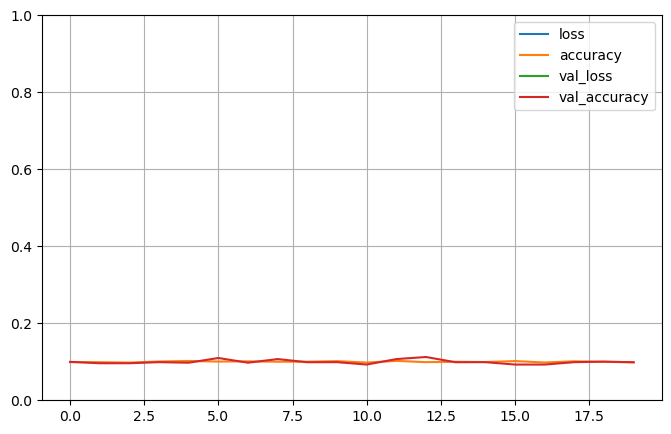

In [65]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertikale Bereich auf (0,1) setzten
plt.show()

In [66]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28], name = 'Input'),
    keras.layers.Dense(200,activation = 'relu', name = 'layer_1'),
    keras.layers.Dense(9, name='Output')
])
model_2.compile(loss='mean_squared_error', optimizer='Adam', metrics=["accuracy"])  # Using MSE for loss and MAE for metrics
model_2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 


 layer_1 (Dense)             (None, 200)               157000    
                                                                 
 Output (Dense)              (None, 9)                 1809      
                                                                 
Total params: 158,809
Trainable params: 158,809
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.fit(X_train, y_train, epochs=20, validation_data = (X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.0987 - val_loss: 27.3188 - val_accuracy: 0.0990
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.1004 - val_loss: 27.3188 - val_accuracy: 0.1070
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.0993 - val_loss: 27.3188 - val_accuracy: 0.1070
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3032 - accuracy: 0.0995 - val_loss: 27.3188 - val_accuracy: 0.0928
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.1030 - val_loss: 27.3188 - val_accuracy: 0.1098
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.0991 - val_loss: 27.3188 - val_accuracy: 0.0976
Epoch 7/20
1719/1719 [==============================] - 2s 1ms/step - loss: 27.3033 - accuracy: 0.1001 - val_loss: 27.3188 -

In [46]:
test_loss = model.evaluate(X_test, y_test)
test_loss_2 = model_2.evaluate(X_test, y_test)
print("Test Loss of Model 1:", test_loss)
print("Test Loss of Model 2:", test_loss_2)

313/313 [==============================] - 0s 493us/step - loss: 27.5133 - accuracy: 0.1068
Test Loss of Model 1: [0.6659497618675232, 0.09279999881982803]
Test Loss of Model 2: [27.51325035095215, 0.10679999738931656]


In [54]:
model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28], name = 'Input'),
    keras.layers.Dense(300,activation = 'relu', name = 'layer_1'),
    keras.layers.Dense(200,activation = 'relu', name = 'layer_2'),
    keras.layers.Dense(9, activation = 'softmax',name='Output')
])
model_3.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])  # Using MSE for loss and MAE for metrics
model_3.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 300)               235500    
                                                                 
 layer_2 (Dense)             (None, 200)               60200     
                                                                 
 Output (Dense)              (None, 9)                 1809      
                                                                 
Total params: 297,509
Trainable params: 297,509
Non-trainable params: 0
_________________________________________________________________


In [52]:
history_3 = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid,y_valid))
history_3

Epoch 1/20
1719/1719 [==============================] - 2s 938us/step - loss: 0.0590 - accuracy: 0.0785 - val_loss: 0.6567 - val_accuracy: 0.0596
Epoch 2/20
1719/1719 [==============================] - 2s 899us/step - loss: 0.0582 - accuracy: 0.0787 - val_loss: 0.6707 - val_accuracy: 0.0592
Epoch 3/20
1719/1719 [==============================] - 2s 892us/step - loss: 0.0586 - accuracy: 0.0801 - val_loss: 0.6672 - val_accuracy: 0.0702
Epoch 4/20
1719/1719 [==============================] - 1s 868us/step - loss: 0.0566 - accuracy: 0.0823 - val_loss: 0.6753 - val_accuracy: 0.0998
Epoch 5/20
1719/1719 [==============================] - 1s 868us/step - loss: 0.0571 - accuracy: 0.0767 - val_loss: 0.6594 - val_accuracy: 0.0800
Epoch 6/20
1719/1719 [==============================] - 2s 881us/step - loss: 0.0566 - accuracy: 0.0772 - val_loss: 0.6673 - val_accuracy: 0.0900
Epoch 7/20
1719/1719 [==============================] - 2s 895us/step - loss: 0.0553 - accuracy: 0.0784 - val_loss: 0.6748 -

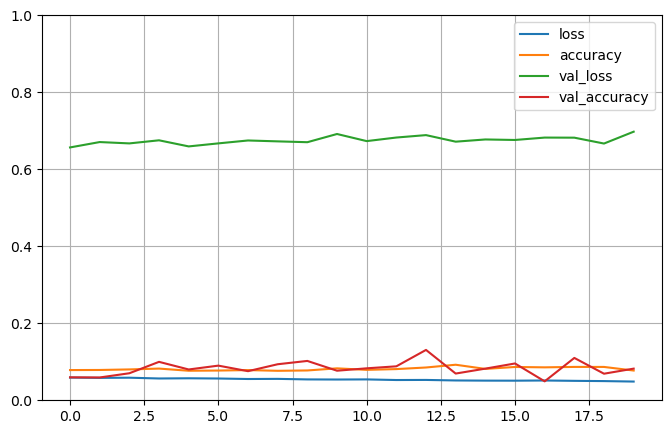

In [53]:
pd.DataFrame(history_3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # vertikale Bereich auf (0,1) setzten
plt.show()

In [57]:
model_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28], name = 'Input'),
    keras.layers.Dense(400,activation = 'relu', name = 'layer_1'),
    keras.layers.Dense(300,activation = 'relu', name = 'layer_2'),
    keras.layers.Dense(200,activation = 'relu', name = 'layer_3'),
    keras.layers.Dense(9, activation = 'softmax',name='Output')
])
model_4.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])  # Using MSE for loss and MAE for metrics
model_4.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Flatten)             (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 400)               314000    
                                                                 
 layer_2 (Dense)             (None, 300)               120300    
                                                                 
 layer_3 (Dense)             (None, 200)               60200     
                                                                 
 Output (Dense)              (None, 9)                 1809      
                                                                 
Total params: 496,309
Trainable params: 496,309
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(X_train, y_train, epochs=20, validation_data = (X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 2s 961us/step - loss: 0.0493 - accuracy: 0.0816 - val_loss: 0.6990 - val_accuracy: 0.0748
Epoch 2/20
1719/1719 [==============================] - 2s 937us/step - loss: 0.0478 - accuracy: 0.0820 - val_loss: 0.6697 - val_accuracy: 0.0572
Epoch 3/20
1719/1719 [==============================] - 2s 925us/step - loss: 0.0485 - accuracy: 0.0821 - val_loss: 0.6615 - val_accuracy: 0.0968
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0478 - accuracy: 0.0835 - val_loss: 0.6699 - val_accuracy: 0.0666
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0465 - accuracy: 0.0839 - val_loss: 0.6701 - val_accuracy: 0.0730
Epoch 6/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0463 - accuracy: 0.0750 - val_loss: 0.6798 - val_accuracy: 0.0898
Epoch 7/20
1719/1719 [==============================] - 2s 947us/step - loss: 0.0469 - accuracy: 0.0791 - val_loss: 0.6868 - val_a